In [3]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator , array_to_img , img_to_array,load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,BatchNormalization,Flatten,GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy,binary_crossentropy
from tensorflow.keras.metrics import binary_accuracy,categorical_accuracy
import matplotlib.pyplot as plt 
from matplotlib.image import imread
from tensorflow.keras.models import Model
from tensorflow.keras import layers
import os 
os.getcwd()

'C:\\Users\\sowri\\Desktop\\codes\\misc coding\\misc languages\\python'

Text(0.5, 1.0, 'pneumonia')

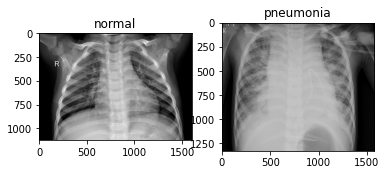

In [18]:
main_dir = 'C:\\Users\\sowri\\Desktop\\codes\\misc coding\\misc languages\\python\\chest_xray'
train_dir = main_dir + '\\train\\'
test_dir = main_dir + '\\test\\'
normal_dir = train_dir + 'NORMAL'
pneumonia_dir = train_dir +'PNEUMONIA'
normal_img = train_dir + 'NORMAL\\' + 'IM-0125-0001.jpeg'
normal_img = imread(normal_img)
pneumonia_img = train_dir + 'PNEUMONIA\\' + 'person1008_virus_1691.jpeg'
pneumonia_img = imread(pneumonia_img)


plt.subplot(1,2,1)
plt.imshow(normal_img,cmap='gray')
plt.title('normal')
plt.subplot(1,2,2)
plt.imshow(pneumonia_img,cmap='gray')
plt.title('pneumonia')

In [46]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_dir +'PNEUMONIA'):
    img = imread(test_dir+'PNEUMONIA\\'+image_filename)
    d1,d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)
print(np.mean(dim1))
print(np.mean(dim2))


765.2897435897436
1140.823076923077


In [62]:
image_shape = (765,1140,1)
batch_size = 16
img = img.reshape(1122, 1704,1)
normal_img = normal_img.reshape(1125, 1600,1)
pneumonia_img = pneumonia_img.reshape(1328, 1576,1)

In [63]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              rescale = 1/255,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode ='nearest')


Text(0.5, 1.0, 'affected')

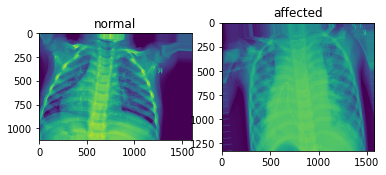

In [64]:
plt.subplot(1,2,1)
plt.imshow(image_gen.random_transform(normal_img))
plt.title('normal')
plt.subplot(1,2,2)
plt.imshow(image_gen.random_transform(pneumonia_img))
plt.title('affected')

In [65]:
image_gen.flow_from_directory(train_dir)
image_gen.flow_from_directory(test_dir)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [67]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size=(3,3),input_shape=image_shape,activation = 'relu' ))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 64,kernel_size=(3,3),activation = 'relu' ))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 128,kernel_size=(3,3),activation = 'relu' ))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer ='adam',metrics=['accuracy'])

In [69]:
early_stop = EarlyStopping(monitor = 'val_loss',patience=2)
train_image_gen = image_gen.flow_from_directory(train_dir,
                                               target_size=image_shape[:2],
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='binary')
test_image_gen = image_gen.flow_from_directory(test_dir,
                                               target_size=image_shape[:2],
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

print(model.summary())

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 763, 1138, 32)     320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 381, 569, 32)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 381, 569, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 379, 567, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 189, 283, 64)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 189, 283, 64)      0         
_____________________________________

In [72]:
results = model.fit_generator(train_image_gen,epochs =20,validation_data=test_image_gen,callbacks = [early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20


KeyboardInterrupt: 

In [75]:
model.save('pneumonia_detector.h5')
model.evaluate_generator(test_image_gen)
pred = model.predict_generator(test_image_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.


KeyboardInterrupt: 

In [76]:
from sklearn.metrics import classification_report
print(classification_report(test_image_gen.classes,pred))

ModuleNotFoundError: No module named 'sklearn'